<a href="https://colab.research.google.com/github/isaacebi/AirAsia-Academy/blob/main/assessment/Malaysian_States_and_City_Coordinates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Data Loading

In [ ]:
# The downloaded datasets from kaggle for easier data loading
PATH = "https://raw.githubusercontent.com/isaacebi/AirAsia-Academy/isaacebi-patch-1/assessment/daerah-working-set.csv"
df = pd.read_csv(PATH)

In [ ]:
df

,Negeri,Daerah,Bandar,Lat,Lon
0,Kedah,Baling,Baling,5.6831,100.9106
1,Kedah,Baling,Baling,5.8149,100.8916
2,Kedah,Baling,Baling,5.7138,100.8009
3,Kedah,Baling,Baling,5.7073,100.9602
4,Kedah,Baling,Baling,5.6875,100.9262
...,...,...,...,...,...
823,Kedah,Kubang Pasu,Bukit Kayu Hitam,6.5160,100.4352
824,Kedah,Kubang Pasu,Bukit Kayu Hitam,6.5000,100.2280
825,Kedah,Kubang Pasu,Bukit Kayu Hitam,6.5150,100.3938
826,Kedah,Kubang Pasu,Bukit Kayu Hitam,6.4950,100.3983


# Data Inspection

In [ ]:
df.info() # check for shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Negeri  828 non-null    object 
 1   Daerah  828 non-null    object 
 2   Bandar  828 non-null    object 
 3   Lat     828 non-null    float64
 4   Lon     828 non-null    float64
dtypes: float64(2), object(3)
memory usage: 32.5+ KB


In [ ]:
df.describe() # check for statistic report

,Lat,Lon
count,828.000000,828.000000
mean,3.970774,105.726168
std,1.652837,5.850464
min,1.010400,99.716600
25%,2.531475,101.258475
50%,3.987450,102.422700
75%,5.434900,111.531550
max,6.924400,119.056600


In [ ]:
df.isna().sum() # check for missing data

Negeri    0
Daerah    0
Bandar    0
Lat       0
Lon       0
dtype: int64

In [ ]:
df.duplicated().sum() # check for duplicated

2

# Data Cleaning

In [ ]:
df2 = df.copy() # create a copy

In [ ]:
df2.drop_duplicates(inplace=True) # dropping duplicated
df2.duplicated().sum() # sanity check

0

# Data Visualization

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df2

,Negeri,Daerah,Bandar,Lat,Lon
0,Kedah,Baling,Baling,5.6831,100.9106
1,Kedah,Baling,Baling,5.8149,100.8916
2,Kedah,Baling,Baling,5.7138,100.8009
3,Kedah,Baling,Baling,5.7073,100.9602
4,Kedah,Baling,Baling,5.6875,100.9262
...,...,...,...,...,...
823,Kedah,Kubang Pasu,Bukit Kayu Hitam,6.5160,100.4352
824,Kedah,Kubang Pasu,Bukit Kayu Hitam,6.5000,100.2280
825,Kedah,Kubang Pasu,Bukit Kayu Hitam,6.5150,100.3938
826,Kedah,Kubang Pasu,Bukit Kayu Hitam,6.4950,100.3983


In [ ]:
df_obj = df2.select_dtypes(include="object") # select object dtype
df_obj

,Negeri,Daerah,Bandar
0,Kedah,Baling,Baling
1,Kedah,Baling,Baling
2,Kedah,Baling,Baling
3,Kedah,Baling,Baling
4,Kedah,Baling,Baling
...,...,...,...
823,Kedah,Kubang Pasu,Bukit Kayu Hitam
824,Kedah,Kubang Pasu,Bukit Kayu Hitam
825,Kedah,Kubang Pasu,Bukit Kayu Hitam
826,Kedah,Kubang Pasu,Bukit Kayu Hitam


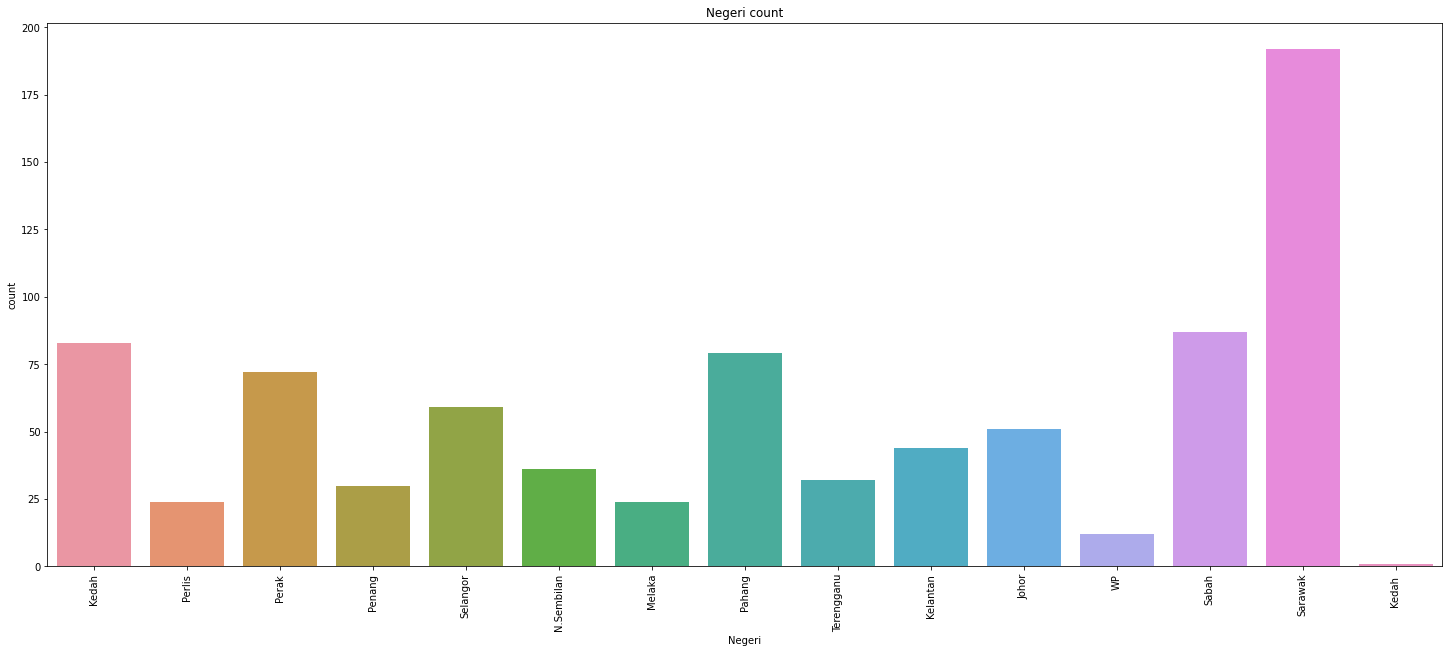

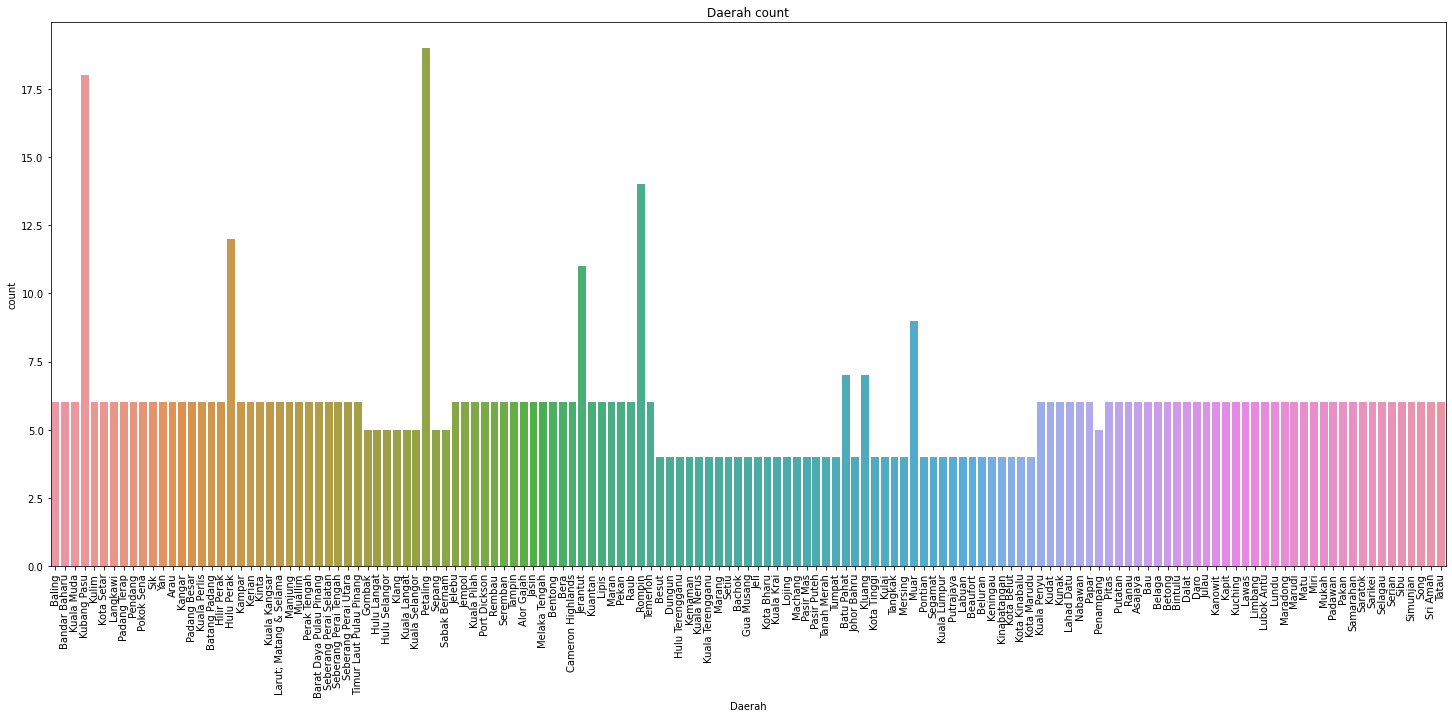

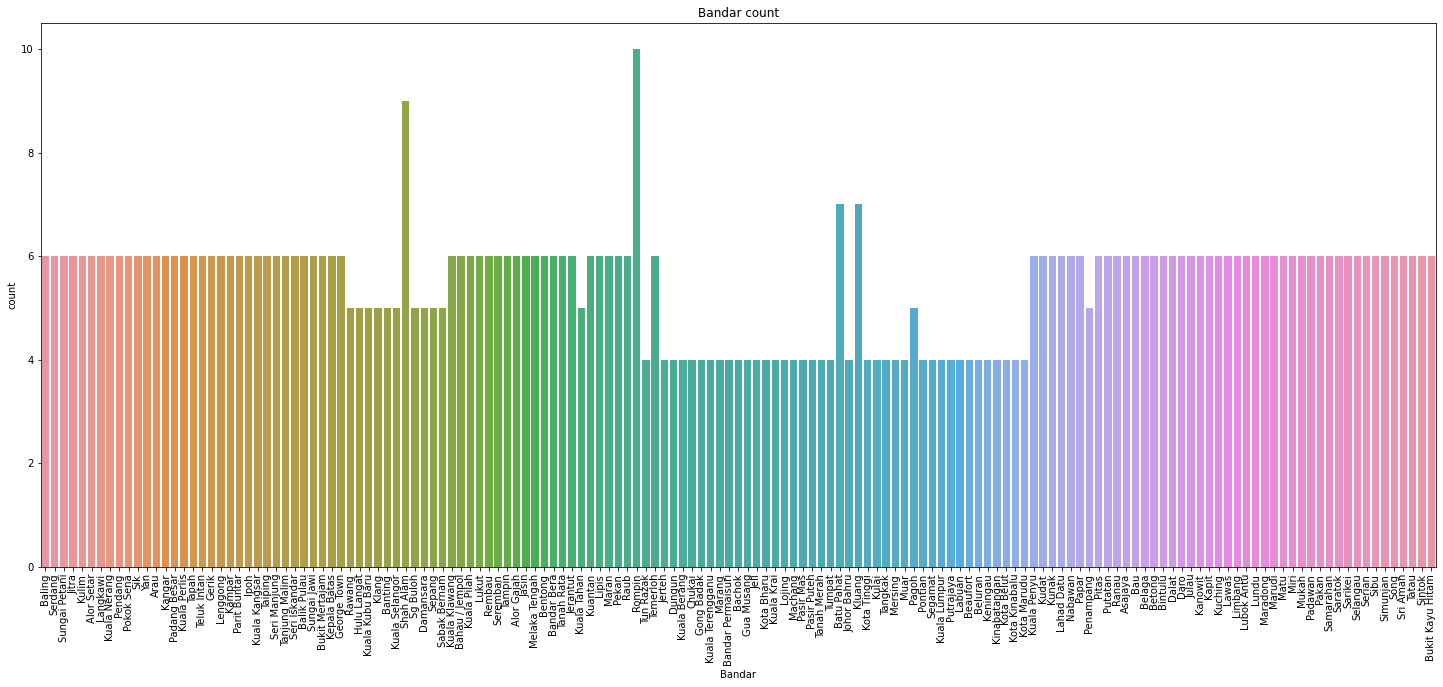

In [ ]:
# countplot for each object dtype
for col in df_obj:
  plt.figure(figsize=(25,10))
  sns.countplot(x=df_obj[col])
  plt.title(f"{col} count")
  plt.xticks(rotation=90)
  plt.show()

Based on the countplot, it seems "Sarawak" have the highest count with almost double compared to the others

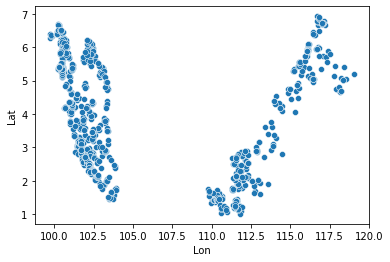

In [ ]:
# plotting map using scatterplot
sns.scatterplot(x=df.Lon, y=df.Lat);

# Actual Map


In [ ]:
# Install folium package
! pip install folium
! pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import folium
import geopandas as gpd

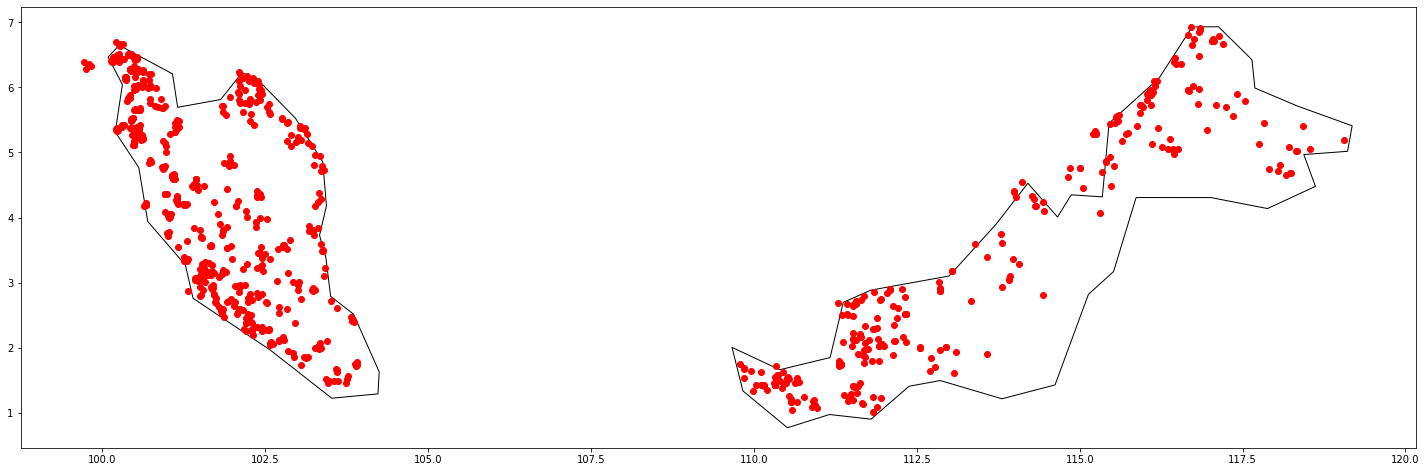

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# restrict to Malaysia.
ax = world[(world.name == 'Malaysia')].plot(color='white', edgecolor='black', figsize=(25,25))

# create GeoDataFrame
gdf = gpd.GeoDataFrame(
    df2, geometry=gpd.points_from_xy(df2.Lon, df2.Lat))

# plot the ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()

It seems that geopandas was not having difficulties in plotting the shape of Malaysia country. Lets try to use other packages: Folium

In [ ]:
# creating the map
uni_map = folium.Map(location=[1.559580, 103.637489], zoom_start=6)

df2.apply(lambda pu:folium.Marker(location=[pu["Lat"], pu["Lon"]],
                                  popup = pu["Bandar"]).add_to(uni_map), axis=1)

# display the map
uni_map

# if "Make this Notebook Trusted" is shown, just wait a little bit for the map to load

# Case study: Classification / Clustering

- Classify or Clustering each points according to "Negeri" columns

In [ ]:
df3 = df2.copy()
df3

,Negeri,Daerah,Bandar,Lat,Lon,geometry
0,Kedah,Baling,Baling,5.6831,100.9106,POINT (100.91060 5.68310)
1,Kedah,Baling,Baling,5.8149,100.8916,POINT (100.89160 5.81490)
2,Kedah,Baling,Baling,5.7138,100.8009,POINT (100.80090 5.71380)
3,Kedah,Baling,Baling,5.7073,100.9602,POINT (100.96020 5.70730)
4,Kedah,Baling,Baling,5.6875,100.9262,POINT (100.92620 5.68750)
...,...,...,...,...,...,...
823,Kedah,Kubang Pasu,Bukit Kayu Hitam,6.5160,100.4352,POINT (100.43520 6.51600)
824,Kedah,Kubang Pasu,Bukit Kayu Hitam,6.5000,100.2280,POINT (100.22800 6.50000)
825,Kedah,Kubang Pasu,Bukit Kayu Hitam,6.5150,100.3938,POINT (100.39380 6.51500)
826,Kedah,Kubang Pasu,Bukit Kayu Hitam,6.4950,100.3983,POINT (100.39830 6.49500)


## Data Manipulation

In [ ]:
# splitting into feature and target
X = df3[['Lat', 'Lon']]
y = df3.Negeri

# check shape
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (826, 2)
y shape: (826,)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# randomness seed
SEED = 123

In [ ]:
# splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=SEED)

print("The split ratio is train ({:.2f}) to test ({:.2f})".format(X_train.shape[0]/X.shape[0], X_test.shape[0]/X.shape[0]))

The split ratio is train (0.70) to test (0.30)


# Supervised Learning

In [ ]:
# lets check number of unique in our target
y.nunique()

15

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# initialize mode - KNN
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

# Return the mean accuracy on the given test data and labels
knn.score(X_test, y_test)

0.9112903225806451

## Model Evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# model prediction
y_knn = knn.predict(X_test)

# classification report
print(classification_report(y_test, y_knn, zero_division=0)) 

              precision    recall  f1-score   support

       Johor       1.00      0.83      0.91        12
       Kedah       0.95      0.86      0.90        21
    Kelantan       0.93      0.87      0.90        15
      Melaka       0.88      1.00      0.93         7
  N.Sembilan       0.94      1.00      0.97        15
      Pahang       0.85      0.89      0.87        19
      Penang       0.92      1.00      0.96        11
       Perak       0.91      0.91      0.91        23
      Perlis       0.70      0.88      0.78         8
       Sabah       0.92      1.00      0.96        23
     Sarawak       0.98      0.98      0.98        63
    Selangor       0.76      0.90      0.83        21
  Terengganu       1.00      0.75      0.86         4
          WP       0.00      0.00      0.00         6

    accuracy                           0.91       248
   macro avg       0.84      0.85      0.84       248
weighted avg       0.90      0.91      0.90       248



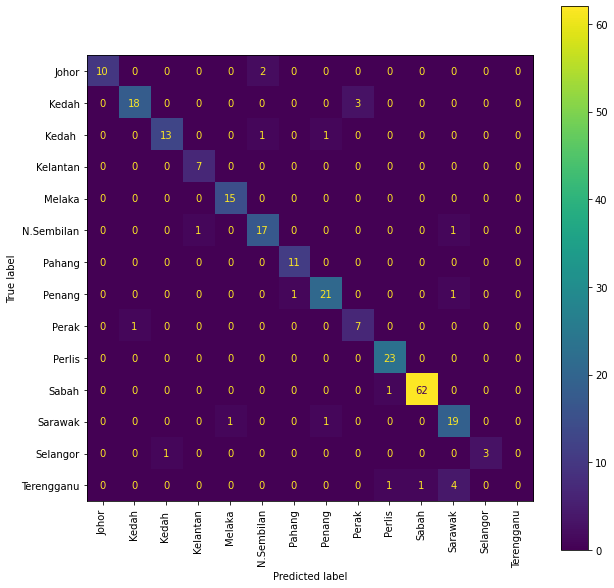

In [ ]:
# confusion metrics
cm = confusion_matrix(y_test, y_knn)

# plotting confusion metrics
cm_display = ConfusionMatrixDisplay(cm, display_labels=np.unique(y))

# enlarge ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax, xticks_rotation='vertical')
plt.show()

# Unsupervised Learning

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [ ]:
# since the KMeans will produced numeric predicted value, lets use Label Encoder to decode the values into string
le = LabelEncoder()
le.fit(y)

LabelEncoder()

In [ ]:
# initialize model - KMeans
kmeans = KMeans(n_clusters=15)
kmeans.fit(X)

KMeans(n_clusters=15)

# Model Evaluation

- For the sake of simplicity, lets do the similiar evaluation as supervised learning

In [ ]:
# model prediction - numeric
y_kmeans = kmeans.predict(X_test)
print(f"Before: {y_kmeans}")

Before: [ 7  5  1  8  5  6  5  4 10  4  4  4  7  8  8  8  7 12  6 12  3  3  5  4
  4 12  3  2 12  2  4  5  9  9  7 11  1 12  7  7 10  3  9  8 12 12  7  6
  8  9  5  8  0  9  8  2  3 12  3  4  7  8 12  7  4 11  3  3  4  5  7  4
  0 10 11 12  3 12 14  7 12  5 14  4 14 11 14  6  3 14 10  7  5 12  7  5
  5  9  5  9  3  3  8  4 13  5  3  8  3  3  2  5 10  5 11  3  4  6 14 14
  3  7  4  7  7 13  8 14  2  7  9  8  5 14  8 12  9 11 13  1  3  8 14  9
  3  3 14 14  5 11  1  7  9  8  7  3  3  5  0  8  5 11  7  1  8 12  9 10
 12 11  9  8 12 14  9  4  4  7 10 14  3  9 12  7 14  8  4  5  8 11  3 12
  4  8  3  6  7  5  4  7  8  3  7 14 10  7  9 14  9 14 14  3 14  9 11  8
 10 14  4  9 12  7  4 12  1  5 10  3  5 11 13  8  5  3 14  1  8  1 11 10
  4  7 10 12 11  2  7  1]


In [ ]:
# model prediction - string
y_kmeans = le.inverse_transform(y_kmeans) # decode
print(f"After: {y_kmeans}")

After: ['Penang' 'N.Sembilan' 'Kedah' 'Perak' 'N.Sembilan' 'Pahang' 'N.Sembilan'
 'Melaka' 'Sabah' 'Melaka' 'Melaka' 'Melaka' 'Penang' 'Perak' 'Perak'
 'Perak' 'Penang' 'Selangor' 'Pahang' 'Selangor' 'Kelantan' 'Kelantan'
 'N.Sembilan' 'Melaka' 'Melaka' 'Selangor' 'Kelantan' 'Kedah ' 'Selangor'
 'Kedah ' 'Melaka' 'N.Sembilan' 'Perlis' 'Perlis' 'Penang' 'Sarawak'
 'Kedah' 'Selangor' 'Penang' 'Penang' 'Sabah' 'Kelantan' 'Perlis' 'Perak'
 'Selangor' 'Selangor' 'Penang' 'Pahang' 'Perak' 'Perlis' 'N.Sembilan'
 'Perak' 'Johor' 'Perlis' 'Perak' 'Kedah ' 'Kelantan' 'Selangor'
 'Kelantan' 'Melaka' 'Penang' 'Perak' 'Selangor' 'Penang' 'Melaka'
 'Sarawak' 'Kelantan' 'Kelantan' 'Melaka' 'N.Sembilan' 'Penang' 'Melaka'
 'Johor' 'Sabah' 'Sarawak' 'Selangor' 'Kelantan' 'Selangor' 'WP' 'Penang'
 'Selangor' 'N.Sembilan' 'WP' 'Melaka' 'WP' 'Sarawak' 'WP' 'Pahang'
 'Kelantan' 'WP' 'Sabah' 'Penang' 'N.Sembilan' 'Selangor' 'Penang'
 'N.Sembilan' 'N.Sembilan' 'Perlis' 'N.Sembilan' 'Perlis' 'Kelantan'
 'Kelan

In [ ]:
# classification report
print(classification_report(y_test, y_kmeans, zero_division=0)) 

              precision    recall  f1-score   support

       Johor       0.00      0.00      0.00      12.0
       Kedah       0.00      0.00      0.00      21.0
      Kedah        0.00      0.00      0.00       0.0
    Kelantan       0.00      0.00      0.00      15.0
      Melaka       0.00      0.00      0.00       7.0
  N.Sembilan       0.00      0.00      0.00      15.0
      Pahang       0.00      0.00      0.00      19.0
      Penang       0.00      0.00      0.00      11.0
       Perak       0.00      0.00      0.00      23.0
      Perlis       0.00      0.00      0.00       8.0
       Sabah       0.00      0.00      0.00      23.0
     Sarawak       0.00      0.00      0.00      63.0
    Selangor       0.00      0.00      0.00      21.0
  Terengganu       0.00      0.00      0.00       4.0
          WP       0.00      0.00      0.00       6.0

    accuracy                           0.00     248.0
   macro avg       0.00      0.00      0.00     248.0
weighted avg       0.00   

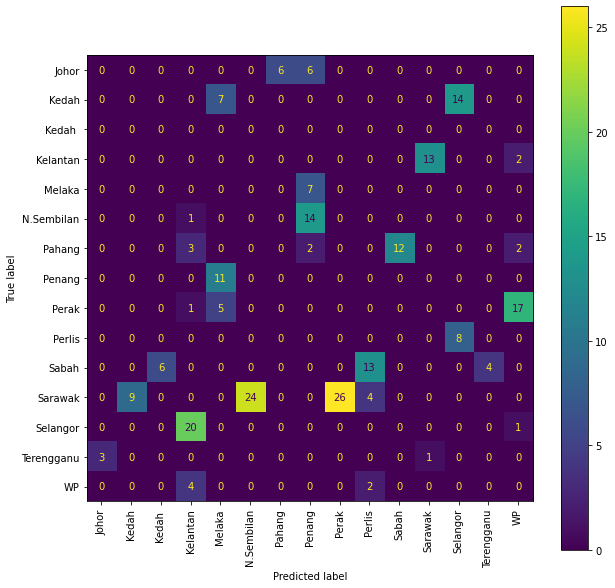

In [ ]:
# confusion metrics
cm = confusion_matrix(y_test, y_kmeans)

# plotting confusion metrics
cm_display = ConfusionMatrixDisplay(cm, display_labels=np.unique(y))

# enlarge ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax, xticks_rotation='vertical')
plt.show()

The results are actually so bad, what happen? lets plot the clustering

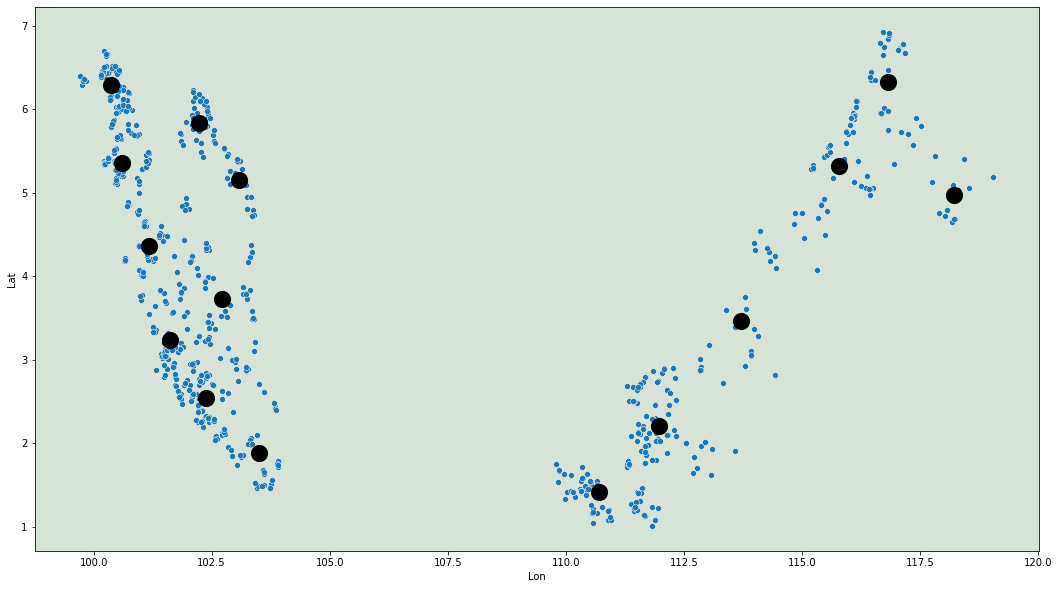

In [ ]:
# plot size
plt.figure(figsize=(18, 10))
plt.axes().set_facecolor("#d5e4d6")

# scatterplot
sns.scatterplot(x=X.Lon, y=X.Lat)

# Plot the centroids of the clusters
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,1], centroids[:,0], marker='o', s=200, linewidths=3, 
           color='k', zorder=10, facecolors='black')
plt.show()

It seems that the core concept of Kmeans, are unsuitable for this case study